# Trevor Maxwell
## Heart Failure and Mortality Prediction
### d20240209

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import dataset

heart_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# preview dataset

heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# check for missing data

heart_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
# overview statistics by column

heart_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
# separate numeric and binary columns

binary_df = heart_df.drop(columns=['age', 'creatinine_phosphokinase', 'ejection_fraction',
                                   'platelets', 'serum_creatinine', 'serum_sodium', 'time'], axis = 1)

numeric_df = heart_df.drop(columns=['anaemia', 'diabetes', 'high_blood_pressure',
                                    'sex', 'smoking', 'DEATH_EVENT'], axis = 1)

In [6]:
# preview binary

binary_df.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0,1,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,1
4,1,1,0,0,0,1


In [7]:
# preview numeric

numeric_df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


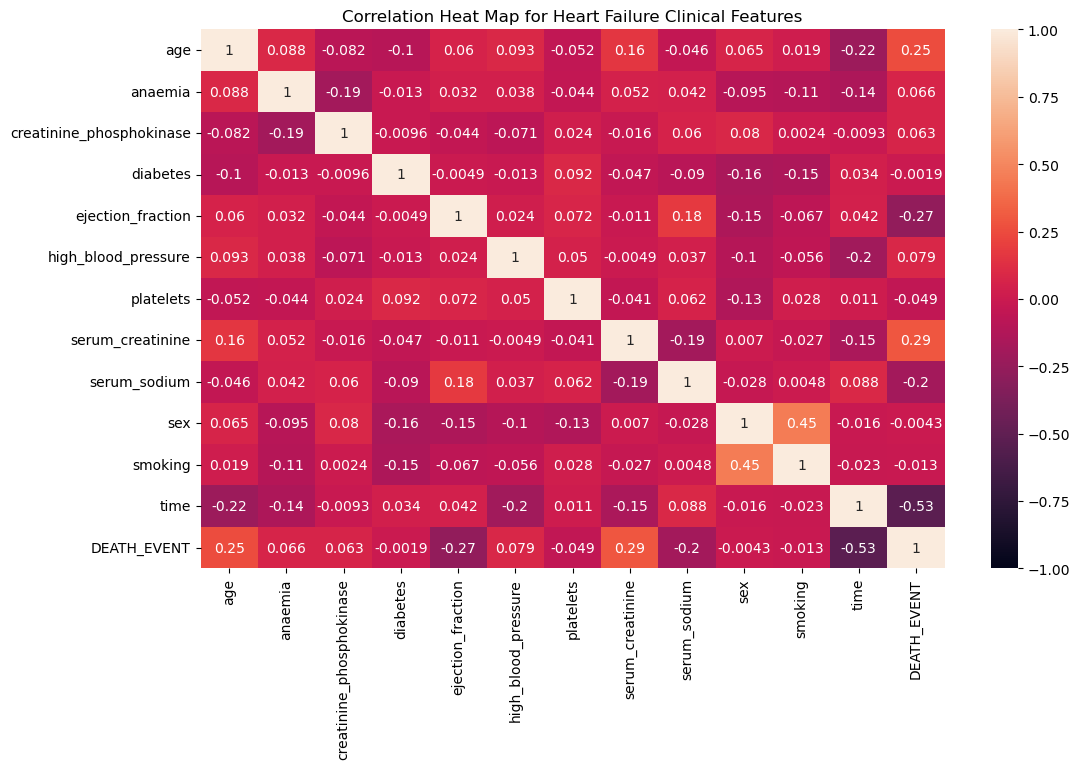

In [8]:
# correlation matrix

plt.figure(figsize=(12, 7))
sb.heatmap(heart_df.corr(), annot = True, vmin = -1, vmax = 1)
plt.title('Correlation Heat Map for Heart Failure Clinical Features')
plt.show()

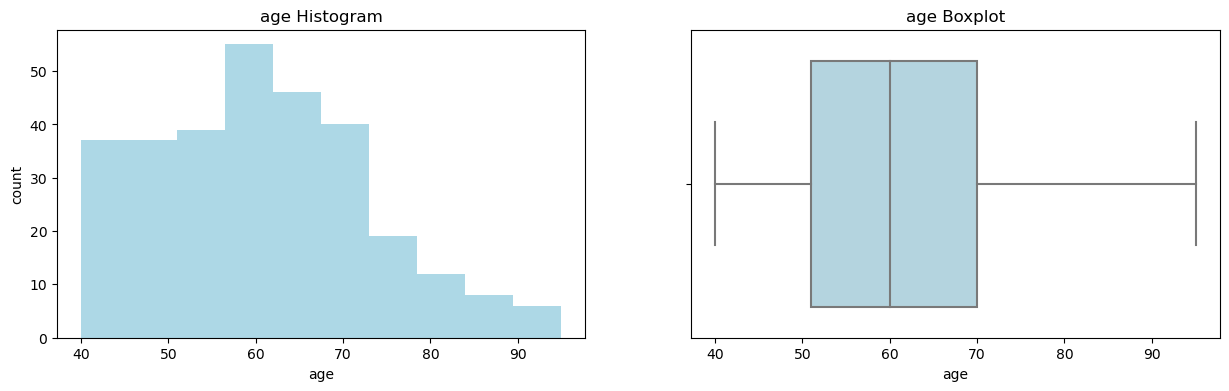

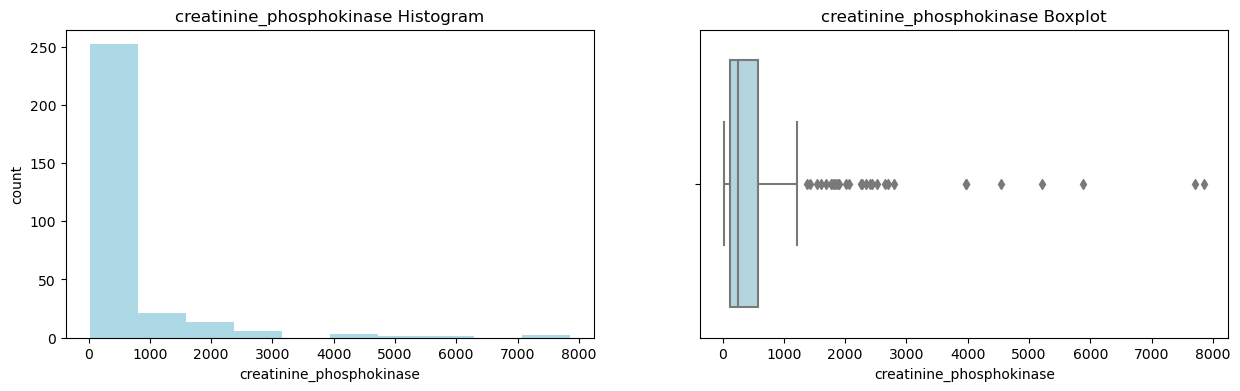

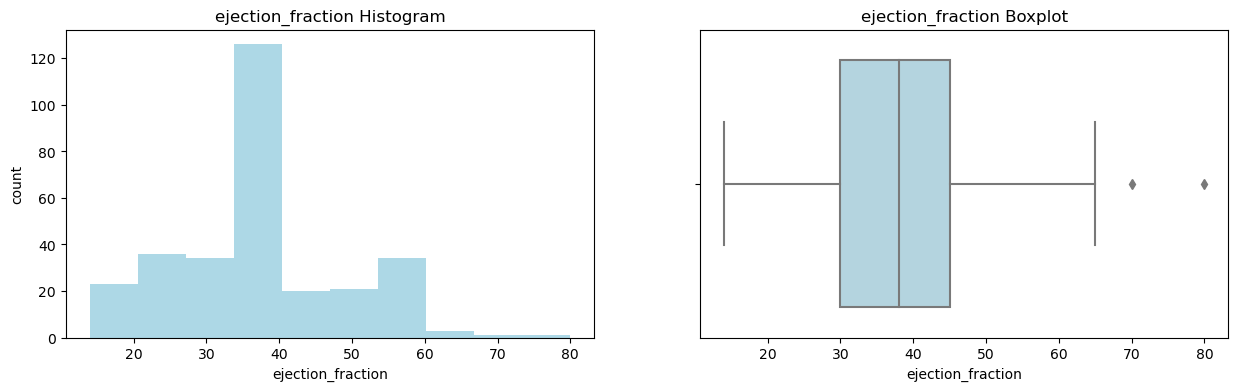

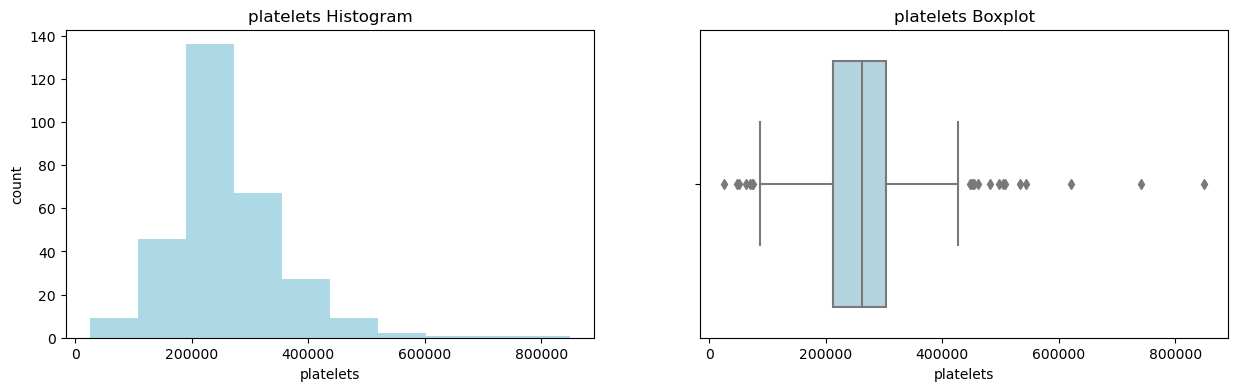

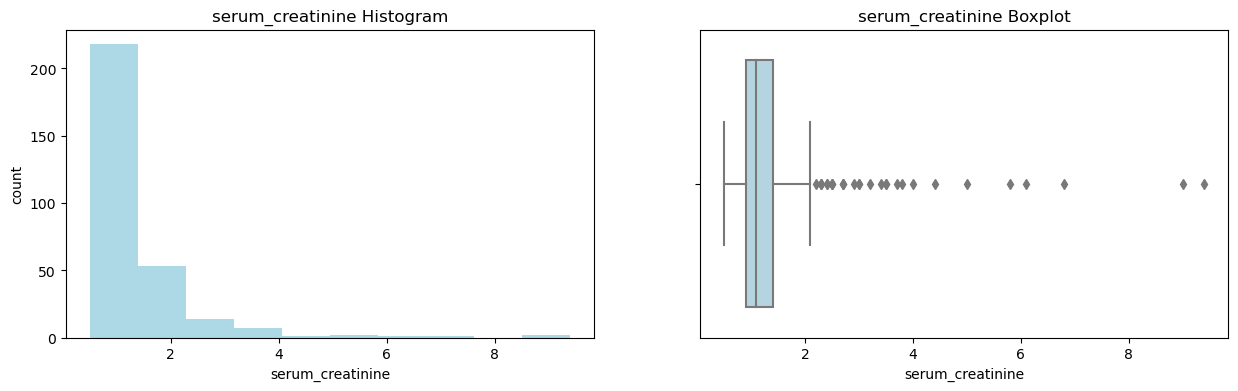

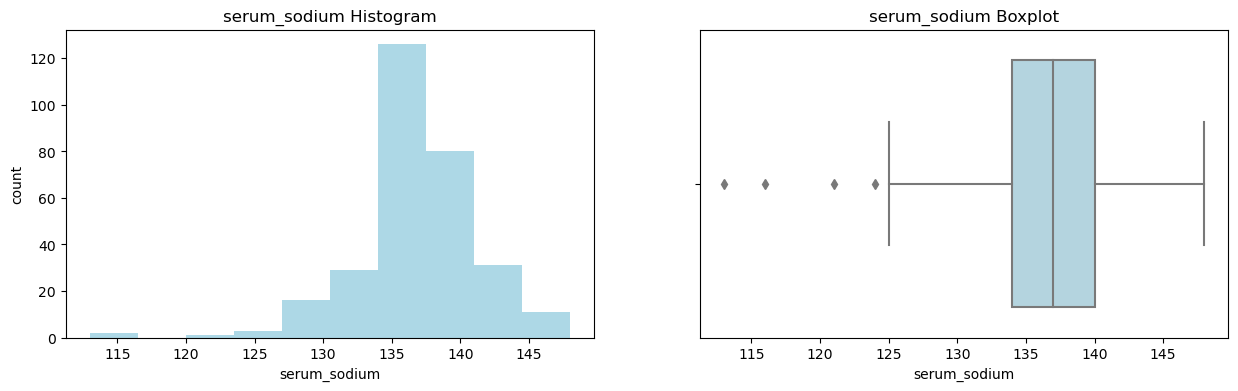

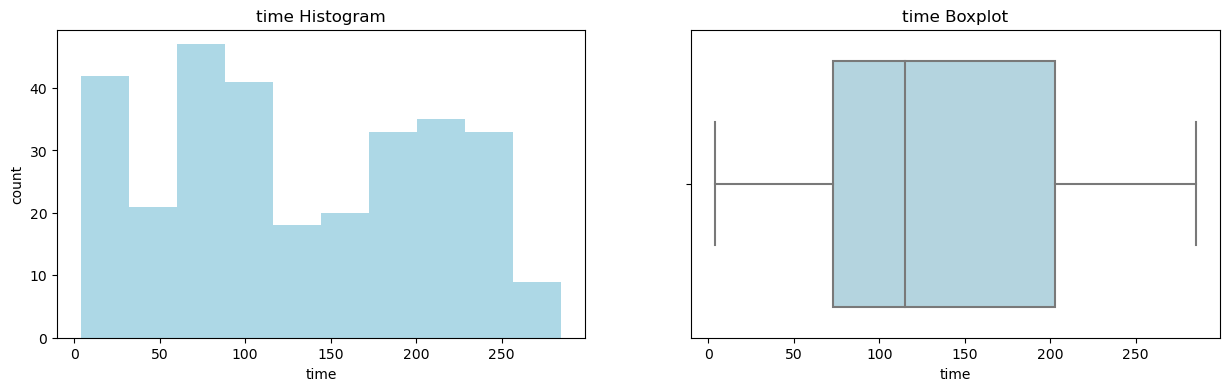

In [9]:
# create histograms and boxplots for numeric features

for col in numeric_df:
#     print(col)
#     print('Skew :', round(heart_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    heart_df[col].hist(grid=False, color = 'lightblue')
    plt.ylabel('count')
    plt.xlabel(f"{col}")
    plt.title(f"{col} Histogram")
    plt.subplot(1, 2, 2)
    sb.boxplot(x=heart_df[col], color = 'lightblue')
    plt.title(f"{col} Boxplot")
    plt.show()

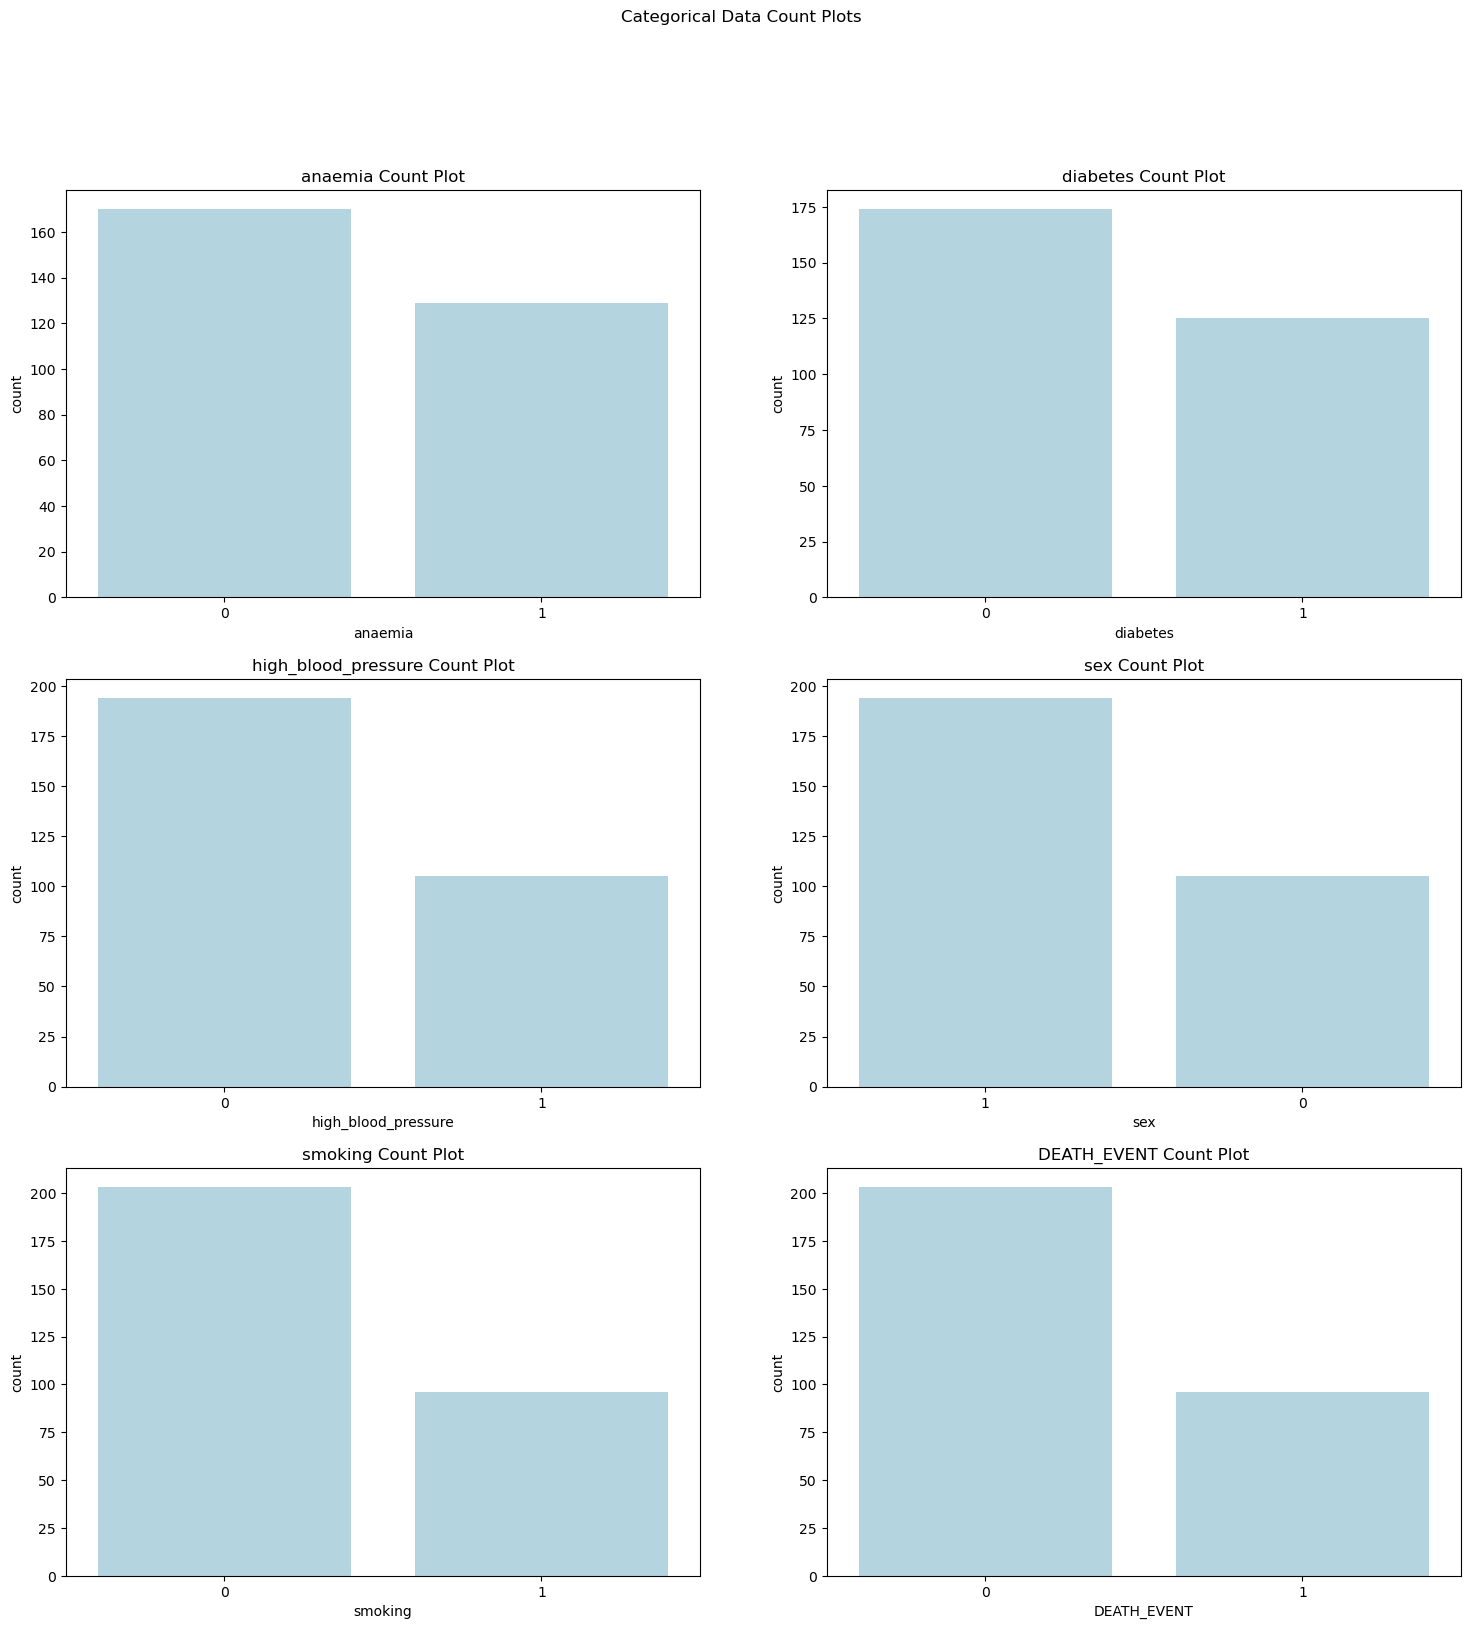

In [10]:
# create count plots for categorical features

placements=[0,0, 0,1, 1,0, 1,1, 2,0, 2,1]
placements[0]
int(placements[1])

fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Categorical Data Count Plots')

i = 0
j = 1
for column in binary_df:
    sb.countplot(ax = axes[placements[i], placements[j]], x = column, data = binary_df, color = 'lightblue', 
                 order = binary_df[column].value_counts().index)
    axes[placements[i], placements[j]].set_title(f"{column} Count Plot");
    i += 2
    j += 2

# Logistic Regression Model

In [11]:
# Split into training and test sets

from sklearn.model_selection import train_test_split

X = heart_df.drop(columns=['DEATH_EVENT'], axis = 1)

y = heart_df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
# split into training and test using stratified shuffle split

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=10)
for train_indices, test_indicies in split.split(heart_df, heart_df["DEATH_EVENT"]):
    strat_train_set = heart_df.loc[train_indices]
    strat_test_set = heart_df.loc[test_indicies]
    

X = strat_train_set.drop(['DEATH_EVENT'], axis=1)
y = strat_train_set['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
# create logistic model and fit training

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

C:\Users\trevo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
# predict test data

y_pred = log_reg.predict(X_test)

In [15]:
# observe accuracy score

log_reg.score(X_test, y_test)

0.8333333333333334

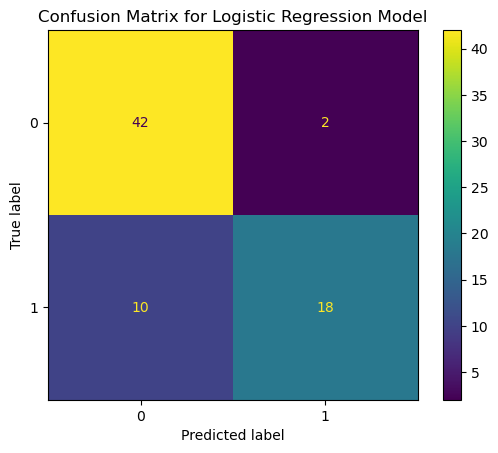

In [16]:
# create confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.title("Confusion Matrix for Logistic Regression Model");

In [17]:
# print confusion matrix

print(confusion_matrix(y_test, y_pred))

TP = confusion_matrix(y_test, y_pred)[0][0]
FP = confusion_matrix(y_test, y_pred)[0][1]
FN = confusion_matrix(y_test, y_pred)[1][0]
TN = confusion_matrix(y_test, y_pred)[1][1]

print(f'True Positives: {TP}')
print(f'False Positives: {FP}')
print(f'True Negatives: {TN}')
print(f'False Negatives: {FN}')

[[42  2]
 [10 18]]
True Positives: 42
False Positives: 2
True Negatives: 18
False Negatives: 10


In [18]:
# obtain precision from sklearn.metrics

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

precision = precision_score(y_test, y_pred)

# obtain recall from sklearn.metrics
recall = recall_score(y_test, y_pred)

# obtain F1-score from sklearn.metrics
f1 = f1_score(y_test, y_pred)

# obtain accuracy from sklearn.metrics
accuracy = accuracy_score(y_test, y_pred)

print(F'Accuracy: {(accuracy * 100):.2f}%')
print(f'Precision: {(precision * 100):.2f}%')
print(f'Recall: {(recall * 100):.2f}%')
print(f'F1 Score: {(f1 * 100):.2f}%')

Accuracy: 83.33%
Precision: 90.00%
Recall: 64.29%
F1 Score: 75.00%


# Random Forest Classifier Model

In [19]:
# split into training and test using stratified shuffle split

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=10)
for train_indices, test_indicies in split.split(heart_df, heart_df["DEATH_EVENT"]):
    strat_train_set = heart_df.loc[train_indices]
    strat_test_set = heart_df.loc[test_indicies]
    

X = strat_train_set.drop(['DEATH_EVENT'], axis=1)
y = strat_train_set['DEATH_EVENT']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
# split into training and test using stratified shuffle split

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=10)
for train_indices, test_indicies in split.split(heart_df, heart_df["DEATH_EVENT"]):
    strat_train_set = heart_df.loc[train_indices]
    strat_test_set = heart_df.loc[test_indicies]

In [21]:
# Standardize data for training

from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['DEATH_EVENT'], axis=1)
y = strat_train_set['DEATH_EVENT']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [22]:
# create Random Forest Classifier model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state=42)

param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [23]:
# create final random forest classifier based on grid search best estimator

final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4, random_state=42)

In [24]:
# Standardize test set

X_test = strat_test_set.drop(['DEATH_EVENT'], axis=1)
y_test = strat_test_set['DEATH_EVENT']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [25]:
# predict test set and print confusion matrix

y_pred = final_clf.predict(X_data_test)

print(confusion_matrix(y_data_test, y_pred))

TP = confusion_matrix(y_test, y_pred)[0][0]
FP = confusion_matrix(y_test, y_pred)[0][1]
FN = confusion_matrix(y_test, y_pred)[1][0]
TN = confusion_matrix(y_test, y_pred)[1][1]

print(f'True Positives: {TP}')
print(f'False Positives: {FP}')
print(f'True Negatives: {TN}')
print(f'False Negatives: {FN}')

[[36  5]
 [ 5 14]]
True Positives: 36
False Positives: 5
True Negatives: 14
False Negatives: 5


In [26]:
final_clf.score(X_data_test, y_data_test)

0.8333333333333334

In [27]:
# obtain precision from sklearn.metrics
precision = precision_score(y_data_test, y_pred)

# obtain recall from sklearn.metrics
recall = recall_score(y_data_test, y_pred)

# obtain F1-score from sklearn.metrics
f1 = f1_score(y_data_test, y_pred)

# obtain accuracy from sklearn.metrics
accuracy = accuracy_score(y_data_test, y_pred)

print(F'Accuracy: {(accuracy * 100):.2f}%')
print(f'Precision: {(precision * 100):.2f}%')
print(f'Recall: {(recall * 100):.2f}%')
print(f'F1 Score: {(f1 * 100):.2f}%')

Accuracy: 83.33%
Precision: 73.68%
Recall: 73.68%
F1 Score: 73.68%


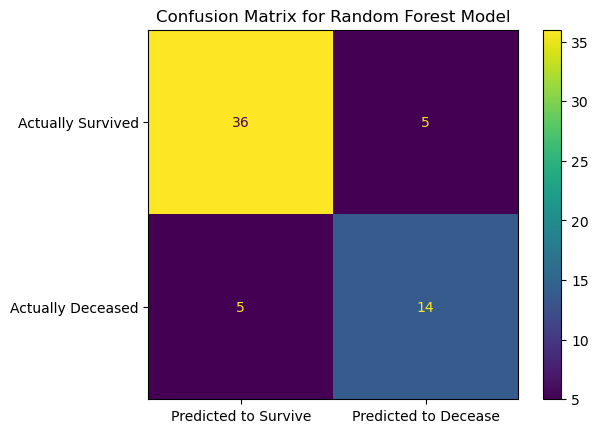

In [28]:
# visualize confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ConfusionMatrixDisplay(confusion_matrix(y_data_test, y_pred)).plot()
plt.title('Confusion Matrix for Random Forest Model');
plt.xticks(ticks=[0,1], labels=['Predicted to Survive', 'Predicted to Decease'])
plt.yticks(ticks=[0,1], labels=['Actually Survived', 'Actually Deceased'])
plt.ylabel(None)
plt.xlabel(None);

# K Nearest Neighbors Model

In [29]:
# split into training and test sets

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_indices, test_indicies in split.split(heart_df, heart_df["DEATH_EVENT"]):
    strat_train_set = heart_df.loc[train_indices]
    strat_test_set = heart_df.loc[test_indicies]

In [30]:
# scale training set

from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['DEATH_EVENT'], axis=1)
y = strat_train_set['DEATH_EVENT']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [31]:
# fit training set to model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_data, y_data)

KNeighborsClassifier(n_neighbors=7)

In [32]:
# scale test set
from sklearn.preprocessing import StandardScaler

X_test = strat_test_set.drop(['DEATH_EVENT'], axis=1)
y_test = strat_test_set['DEATH_EVENT']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [33]:
# predict test set and print confusion matrix

y_pred = knn.predict(X_data_test)

print(confusion_matrix(y_data_test, y_pred))

TP = confusion_matrix(y_test, y_pred)[0][0]
FP = confusion_matrix(y_test, y_pred)[0][1]
FN = confusion_matrix(y_test, y_pred)[1][0]
TN = confusion_matrix(y_test, y_pred)[1][1]

print(f'True Positives: {TP}')
print(f'False Positives: {FP}')
print(f'True Negatives: {TN}')
print(f'False Negatives: {FN}')

[[39  2]
 [15  4]]
True Positives: 39
False Positives: 2
True Negatives: 4
False Negatives: 15


In [34]:
# obtain precision from sklearn.metrics
precision = precision_score(y_data_test, y_pred)

# obtain recall from sklearn.metrics
recall = recall_score(y_data_test, y_pred)

# obtain F1-score from sklearn.metrics
f1 = f1_score(y_data_test, y_pred)

# obtain accuracy from sklearn.metrics
accuracy = accuracy_score(y_data_test, y_pred)

print(F'Accuracy: {(accuracy * 100):.2f}%')
print(f'Precision: {(precision * 100):.2f}%')
print(f'Recall: {(recall * 100):.2f}%')
print(f'F1 Score: {(f1 * 100):.2f}%')

Accuracy: 71.67%
Precision: 66.67%
Recall: 21.05%
F1 Score: 32.00%


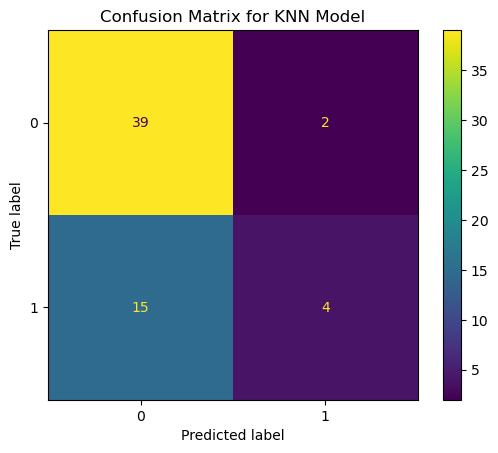

In [35]:
# visualize confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ConfusionMatrixDisplay(confusion_matrix(y_data_test, y_pred)).plot(colorbar='red')
plt.title('Confusion Matrix for KNN Model');